<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_98/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad 1 - Semana 4**

# **Limpieza de datos**

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
pagos = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

#**Información del conjunto de datos:**

Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y **compara la precisión predictiva** de **la probabilidad de incumplimiento** entre **seis métodos de minería de datos**.

Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de **la probabilidad de incumplimiento estimada** **será más valioso** que el resultado binario de la clasificación: **clientes creíbles o no creíbles**. Debido a que se *desconoce* **la probabilidad real de incumplimiento**, este estudio presentó el novedoso "**Método de suavizado de clasificación**" para **estimar** la probabilidad real de incumplimiento.

Con **la probabilidad real de incumplimiento** como variable de respuesta **(Y)** y **la probabilidad predictiva de incumplimiento** como variable independiente **(X)**, el resultado de la regresión lineal simple **(Y = A + BX)** muestra que el modelo de pronóstico producido por la red neuronal artificial tiene **el coeficiente de determinación más alto**; su intersección de regresión **(A)** es cercana a cero y el coeficiente de regresión **(B)** a uno. Por lo tanto, **entre las seis técnicas de minería de datos**, la red neuronal artificial **es la única que puede estimar con precisión** la **probabilidad real de incumplimiento**.


##**Descripción de la base de datos**

Esta investigación empleó una variable binaria, pago por defecto **(Sí = 1, No = 0**), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes **23 variables** como variables explicativas:

*   **X1**: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

*   **X2**: Género (1 = masculino; 2 = femenino).

*   **X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros)

*   **X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros).

*   **X5**: Edad (año).

*   **X6 - X11**: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:

    *   **X6** = el estado de pago en septiembre de 2005;
    *   **X7** = el estado de pago en agosto de 2005;
    *   **X11** = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

*  **X12-X17**: Importe del estado de cuenta (dólar NT).  

    *   **X12** = monto del estado de cuenta en septiembre de 2005;
    *   **X13** = monto del estado de cuenta en agosto de 2005;
    *   **X17** = monto del estado de cuenta en abril de 2005.

*   **X18-X23**: Monto del pago anterior (dólar NT).

    *   **X18** = monto pagado en septiembre de 2005;
    *   **X19** = monto pagado en agosto de 2005;
    *   **X23** = monto pagado en abril de 2005. 


Base de datos (DataFrame):

In [3]:
df_pagos = pd.read_csv(pagos)
df = df_pagos.copy()

# Nos llevamos todos los valores vacíos

In [4]:
df.dropna(axis = 0, inplace=True)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


#Renombramos las columnas

In [5]:
df.rename(columns = {"X1": "Monto", "X2": "Genero", "X3": "Educacion", "X4" : "Estado Civil", "X5" : "Edad",
                     "X6": "PAG_SEP", "X7": "PAG_AGO", "X8":"PAG_JUL", "X9": "PAG_JUN", "X10":"PAG_MAY", "X11": "AMORT.ABR", "X12": "ESTCTA_SEP", "X13": "ESTCTA_AGO", "X14": "ESTCTA_JUL", "X15":"ESTCTA_JUN",
                     "X16": "ESTCTA_MAY", "X17":"ESTCTA_ABR", "X18":"MP_SEP", "X19":"MP_AGO", "X20":"MP_JUL", "X21":"MP_JUN", "X22":"MP_MAY", "X23":"MP_ABR", "Y":"Var_Sal"}, inplace = True)
          
df


,ID,Monto,Genero,Educacion,Estado Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,...,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,Var_Sal
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [6]:
#Categorizamos las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29958 non-null  int64  
 1   Monto         29958 non-null  int64  
 2   Genero        29958 non-null  float64
 3   Educacion     29958 non-null  float64
 4   Estado Civil  29958 non-null  float64
 5   Edad          29958 non-null  float64
 6   PAG_SEP       29958 non-null  float64
 7   PAG_AGO       29958 non-null  float64
 8   PAG_JUL       29958 non-null  float64
 9   PAG_JUN       29958 non-null  float64
 10  PAG_MAY       29958 non-null  float64
 11  AMORT.ABR     29958 non-null  float64
 12  ESTCTA_SEP    29958 non-null  float64
 13  ESTCTA_AGO    29958 non-null  float64
 14  ESTCTA_JUL    29958 non-null  float64
 15  ESTCTA_JUN    29958 non-null  float64
 16  ESTCTA_MAY    29958 non-null  float64
 17  ESTCTA_ABR    29958 non-null  float64
 18  MP_SEP        29958 non-nu

# Eliminamos las columnas categóricas y dejamos las continuas o numéricas

In [7]:
df_pagos = pd.read_csv(pagos)
df = df.drop(["Genero", "Educacion", "Estado Civil", "PAG_SEP", "PAG_AGO", "PAG_JUL", "PAG_JUN", "PAG_MAY", "AMORT.ABR", "Var_Sal"], axis = 1)
df

,ID,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
0,1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [8]:
df_num = df.iloc[:,1:]
df_num.head()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [9]:
#Realizamos la correlación
df_num.corr()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
Monto,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Edad,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
ESTCTA_SEP,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
ESTCTA_AGO,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
ESTCTA_JUL,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
ESTCTA_JUN,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
ESTCTA_MAY,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
ESTCTA_ABR,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
MP_SEP,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
MP_AGO,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


#Visualizar datos

In [10]:
import seaborn as sns

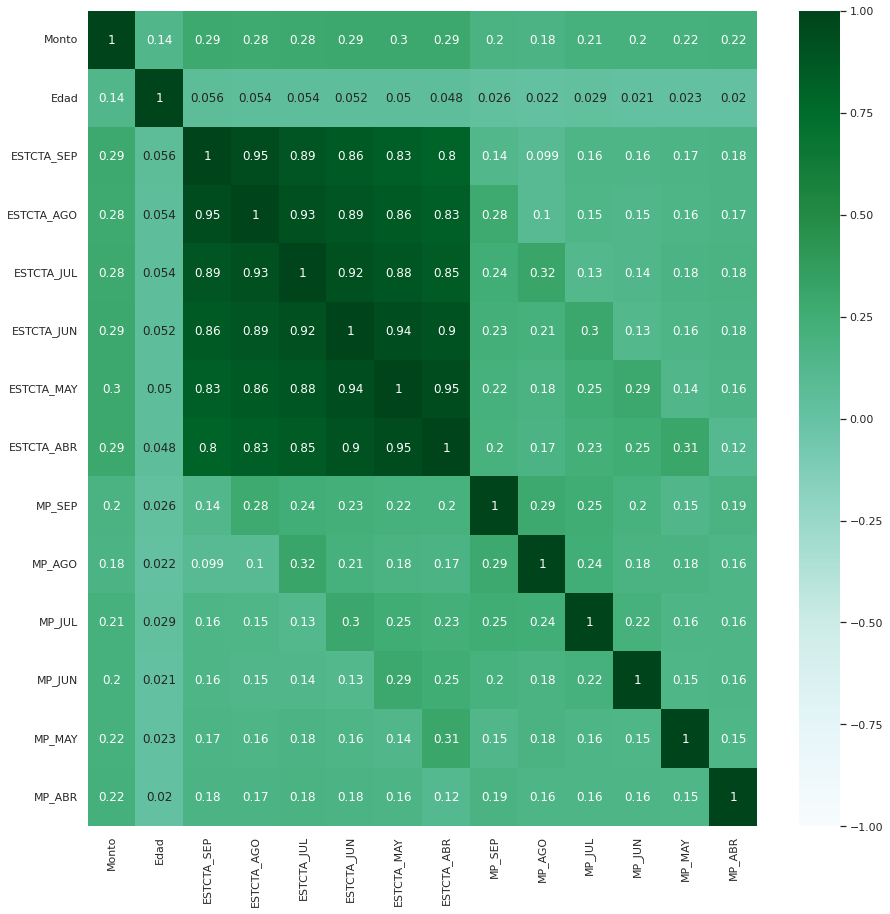

In [11]:
corrs = df_num.corr()
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

In [12]:
#Varianzas de las variables
cols = ["Monto", "Edad", "ESTCTA_SEP",	"ESTCTA_AGO", "ESTCTA_JUL", "ESTCTA_JUN",	"ESTCTA_MAY", "ESTCTA_ABR", "MP_SEP",	"MP_AGO",	"MP_JUL",	"MP_JUN", "MP_MAY", "MP_ABR"]

summary = {
  "Varianzas": df_num[cols].var()[0:15],
  "Valor Min": df_num[cols].min()[0:15],
  "Valor Max": df_num[cols].max()[0:15]
}

pd.DataFrame(summary, index = cols).transpose()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
Varianzas,1.683177e+10,84.903672,5.427998e+09,5.071040e+09,4.814312e+09,4.142813e+09,3.699829e+09,3.550120e+09,2.745259e+08,5.315784e+08,3.103706e+08,2.457434e+08,2.336481e+08,3.164479e+08
Valor Min,1.000000e+04,21.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Valor Max,1.000000e+06,79.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05


##Buscamos la varianza total de todas las variables

In [13]:
t = df_num.var().sum()

In [14]:
var_ESTCTA_SEP = df_num.ESTCTA_SEP.var()
#var_sod = df_num.sodium.var()
#var_fib = df_num.fiber.var()

In [15]:
print('Varianza Total \t\t:',t.round(2) )
print('Varianza ESTCTA_SEP \t:', ((var_ESTCTA_SEP/t)*100).round(2),'%' )
#print('Varianza Sodio \t\t:', ((var_sod/t)*100).round(2),'%' )
#print('Varianza Fibras \t:', ((var_fib/t)*100).round(2),'%' )

Varianza Total 		: 45450192693.29
Varianza ESTCTA_SEP 	: 11.94 %


#Escalamos el Data Frame

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_num)

scaled[:5]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

#Convertimos en un dataframe

In [18]:
scaled_df = pd.DataFrame(scaled, columns=df_num.columns)
scaled_df.head()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [19]:
summary = {
  "Varianzas": scaled_df[cols].var()[0:15],
  "Valor Min": scaled_df[cols].min()[0:15],
  "Valor Max": scaled_df[cols].max()[0:15]
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary, index = cols).transpose()

,Monto,Edad,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.214443,-1.571867,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483,-0.341890,-0.257018,-0.296782,-0.308107,-0.314124,-0.293485
Valor Max,6.416489,4.722789,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493,52.381623,72.795041,50.565325,39.306732,27.590403,29.425741


#**PCA**
Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos:

In [20]:
pcs = PCA()
pcs.fit(df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11
Standard deviation,155846.188859,37338.865667,27844.266355,21441.524432,20314.800613,18521.060368,17040.622246,16328.049834,11623.455093,10434.984689,8786.754256,8200.532958
Proportion of variance,0.848685,0.048717,0.027091,0.016064,0.014420,0.011986,0.010147,0.009316,0.004721,0.003805,0.002698,0.002350
Cumulative proportion,0.848685,0.897402,0.924493,0.940557,0.954978,0.966964,0.977111,0.986427,0.991147,0.994952,0.997650,1.000000


#Plot

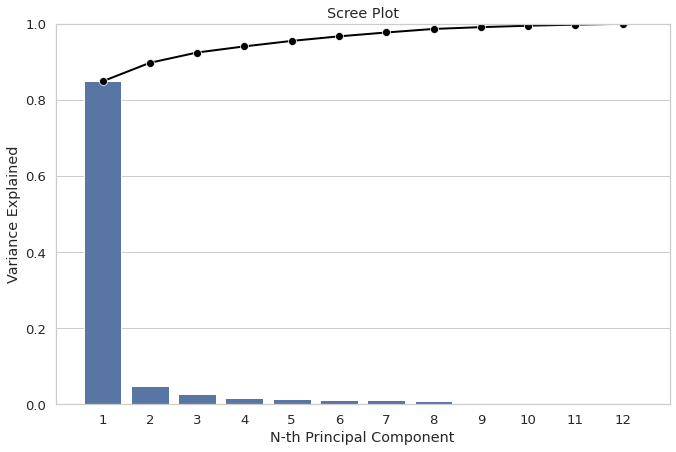

In [21]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(11, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [22]:
((pcsSummary_df.iloc[2][2])*100).round(0)

92.0

In [23]:
#Primeros 2 componentes
((pcsSummary_df.iloc[2][1])*100).round(2)

89.74

In [24]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Standard deviation,155846.1889,37338.8657,27844.2664,21441.5244,20314.8006,18521.0604,17040.6222,16328.0498,11623.4551,10434.9847,8786.7543,8200.5330
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,0.0027,0.0023
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,0.9977,1.0000


In [25]:
pcs.components_

array([[ 0.44656461,  0.44087693,  0.42919077,  0.39747537,  0.36945588,
         0.35264686,  0.02497139,  0.02839799,  0.02384069,  0.0193439 ,
         0.01899535,  0.02062347],
       [-0.54888254, -0.39387686, -0.05033694,  0.25752056,  0.42411976,
         0.47973474,  0.04354568,  0.1693322 ,  0.1418858 ,  0.1001013 ,
         0.06198363, -0.01232463],
       [-0.19018781, -0.03592038,  0.53851465,  0.06858663, -0.20601911,
        -0.31179823,  0.20413308,  0.68037607,  0.04461404, -0.02525761,
         0.02765427,  0.14212366],
       [ 0.31379593,  0.02841729, -0.33293318, -0.24751485, -0.003609  ,
         0.12704839,  0.24451464,  0.25931845,  0.42290096,  0.41473739,
         0.31395123,  0.36879668],
       [ 0.07828899, -0.07521296,  0.22987527, -0.5474724 , -0.07862123,
         0.43473142, -0.17223316,  0.1907648 , -0.47326589,  0.12523702,
         0.28471043, -0.23171547],
       [-0.45818916,  0.52636109,  0.03092311, -0.17722815, -0.0138917 ,
         0.07663942,  

In [26]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
ESTCTA_SEP,0.446565,-0.548883,-0.190188,0.313796,0.078289
ESTCTA_AGO,0.440877,-0.393877,-0.035920,0.028417,-0.075213
ESTCTA_JUL,0.429191,-0.050337,0.538515,-0.332933,0.229875
ESTCTA_JUN,0.397475,0.257521,0.068587,-0.247515,-0.547472
ESTCTA_MAY,0.369456,0.424120,-0.206019,-0.003609,-0.078621
ESTCTA_ABR,0.352647,0.479735,-0.311798,0.127048,0.434731
MP_SEP,0.024971,0.043546,0.204133,0.244515,-0.172233
MP_AGO,0.028398,0.169332,0.680376,0.259318,0.190765
MP_JUL,0.023841,0.141886,0.044614,0.422901,-0.473266
MP_JUN,0.019344,0.100101,-0.025258,0.414737,0.125237


In [27]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
ESTCTA_SEP,0.446565,-0.548883,-0.190188,0.313796,0.078289,-0.458189,0.008577,0.077790,0.171313,-0.266927,-0.204596,-0.004456
ESTCTA_AGO,0.440877,-0.393877,-0.035920,0.028417,-0.075213,0.526361,-0.065076,0.103413,0.012025,0.351264,0.476445,0.014769
ESTCTA_JUL,0.429191,-0.050337,0.538515,-0.332933,0.229875,0.030923,0.079499,-0.117665,-0.336217,0.153182,-0.441660,-0.082974
ESTCTA_JUN,0.397475,0.257521,0.068587,-0.247515,-0.547472,-0.177228,-0.228896,-0.101795,-0.140917,-0.372583,0.233541,0.320344
ESTCTA_MAY,0.369456,0.424120,-0.206019,-0.003609,-0.078621,-0.013892,0.480798,0.124713,0.099384,-0.055804,0.092366,-0.605435
ESTCTA_ABR,0.352647,0.479735,-0.311798,0.127048,0.434731,0.076639,-0.262927,-0.099633,0.240806,0.203435,-0.158534,0.365659
MP_SEP,0.024971,0.043546,0.204133,0.244515,-0.172233,0.609538,-0.080363,0.181476,0.275944,-0.471005,-0.396501,-0.015015
MP_AGO,0.028398,0.169332,0.680376,0.259318,0.190765,-0.257290,-0.001958,0.239523,0.360795,0.023182,0.383973,0.047467
MP_JUL,0.023841,0.141886,0.044614,0.422901,-0.473266,-0.156551,-0.304679,0.248278,-0.192799,0.503796,-0.285763,-0.151205
MP_JUN,0.019344,0.100101,-0.025258,0.414737,0.125237,0.082474,0.450781,0.236372,-0.589458,-0.135020,0.079024,0.404305


In [28]:
from sklearn import preprocessing

In [29]:
df.iloc[:, 3:].head()

,ESTCTA_SEP,ESTCTA_AGO,ESTCTA_JUL,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [30]:
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:, 5:].dropna(axis=0)))

PCA()

In [36]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard deviation,2.0458,1.2244,0.9520,0.9367,0.9286,0.8818,0.8429,0.3382,0.2060,0.1580
Proportion of variance,0.4185,0.1499,0.0906,0.0877,0.0862,0.0778,0.0710,0.0114,0.0042,0.0025
Cumulative proportion,0.4185,0.5684,0.6591,0.7468,0.8330,0.9108,0.9818,0.9933,0.9975,1.0000


In [37]:
pcsSummary_df.iloc[2,6]

0.9818231606214401

In [39]:
from sklearn.decomposition import PCA

In [40]:
pcs = PCA()

In [41]:
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:5]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

• El % de la varianza explicada por cada componente

• El acumulado de la varianza explicada por cada componente

In [42]:
pcsSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.
                                                               explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(pcs.
                                                                explained_variance_ratio_) * 100})
pcsSummary_df   

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


#Agregamos etiquetas

In [43]:
#Lista de nombre de los componentes
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [44]:
#colocamos valores de cada componente
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)

print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


Texto


In [45]:
total_var =scaled_df.var().sum()

pd.DataFrame({
  "Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Monto,7.142857,7.142857
Edad,7.142857,14.285714
ESTCTA_SEP,7.142857,21.428571
ESTCTA_AGO,7.142857,28.571429
ESTCTA_JUL,7.142857,35.714286
ESTCTA_JUN,7.142857,42.857143
ESTCTA_MAY,7.142857,50.000000
ESTCTA_ABR,7.142857,57.142857
MP_SEP,7.142857,64.285714
MP_AGO,7.142857,71.428571


#Composición de cada componente arrojado por PCA

In [46]:
comps_df = pd.DataFrame(
  pcs.components_.round(4), # pcs.components  = pesos de cada uno de los componentes
  columns = pcs_df.columns,
  index = scaled_df.columns) 
comps_df.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807,0.1351,0.1168,0.1281,0.1169,0.1137,0.1055
Edad,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942,0.3832,0.4084,0.3923,0.3496,0.3039,0.3235
ESTCTA_SEP,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185,0.1738,0.2009,0.1221,0.0623,-0.0609,-0.0509
ESTCTA_AGO,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706,0.3621,0.3457,0.2447,-0.0947,-0.6098,-0.3657
ESTCTA_JUL,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650,0.2257,0.1487,-0.2396,-0.5778,-0.1934,0.6592
ESTCTA_JUN,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693,0.0406,0.4084,-0.1082,-0.5008,0.6024,-0.4092
ESTCTA_MAY,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079,-0.2016,-0.2788,0.7852,-0.4622,0.0143,0.0255
ESTCTA_ABR,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003,-0.7487,0.5785,0.0682,0.0778,-0.1649,0.1813
MP_SEP,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587,0.0199,-0.1107,0.1530,0.0988,0.2529,0.3167
MP_AGO,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889,-0.0566,0.0509,0.1449,0.1241,0.0600,-0.0992


In [47]:
#Buscamos los máximos por filas y los valores absolutos
comps_df.iloc[:,:7].abs().idxmax()

PC1        MP_SEP
PC2    ESTCTA_SEP
PC3        MP_AGO
PC4        MP_ABR
PC5        MP_ABR
PC6        MP_JUL
PC7        MP_MAY
dtype: object

In [48]:
comps_df.iloc[:,:15].abs().idxmax()

PC1         MP_SEP
PC2     ESTCTA_SEP
PC3         MP_AGO
PC4         MP_ABR
PC5         MP_ABR
PC6         MP_JUL
PC7         MP_MAY
PC8         MP_JUL
PC9     ESTCTA_ABR
PC10    ESTCTA_ABR
PC11    ESTCTA_MAY
PC12    ESTCTA_JUL
PC13    ESTCTA_AGO
PC14    ESTCTA_JUL
dtype: object

In [49]:
comps_df.PC1.idxmax()

'Edad'

In [ ]:
comps_df.PC1.nlargest(3)

In [51]:
comps_df.PC2.idxmin()

'ESTCTA_SEP'

In [52]:
comps_df.PC2.nsmallest(3)

ESTCTA_SEP   -0.8695
ESTCTA_MAY   -0.0788
ESTCTA_JUL   -0.0398
Name: PC2, dtype: float64

#Graficamos

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt

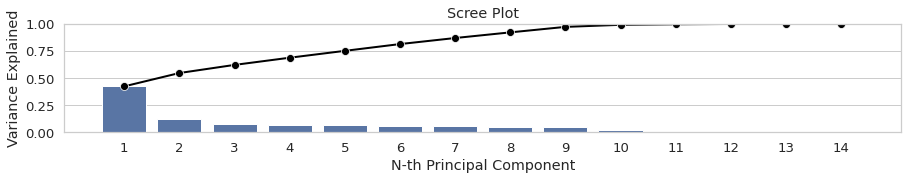

In [54]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(15, 2))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()